In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

## Task a

In [27]:
def mooney_rivlin(T, a, b, l):
    return (a + b/l) * (l**2 - 1/l) - T

def mooney_rivlin_diff(T, a, b, l):
    return a*(1/l**2 + 2*l) + 2*b/l**3 + b
    
def newton(f, l_0, tol=1e-5, **kwargs):
    err = tol * 3
    l = l_0 
    
    while err > tol:
        all_args = kwargs
        all_args['l'] = l
        
        delta_l = mooney_rivlin(**all_args) / mooney_rivlin_diff(**all_args)
        err = abs(delta_l)
        l -= delta_l
        
    return l

In [26]:
newton(mooney_rivlin, 1, T=10, a=1, b=1)

2.777154110014522

## Task d

In [37]:
def mooney_rivlin_stress(a, b, x):
    return x**2 * (a*(1 + x**2) + b) / (1 + x**2)**2 

In [52]:
L = 1
n = 20
a = 20
b = 10
u_0 = 0
h = L / (n + 1)

xs = np.linspace(0, L, n + 1)
Ts = [mooney_rivlin_stress(a, b, x) for x in xs]
ls = [newton(mooney_rivlin, 1, T=T, a=a, b=b) for T in Ts] # lambdas

us = [u_0]
for i in range(1, n + 1):
    interm_sums = np.sum([ls[j] for j in range(1, i)])
    u_i = u_0 + h * (-i + ls[0]/2 + interm_sums + ls[i]/2)
    us.append(u_i)

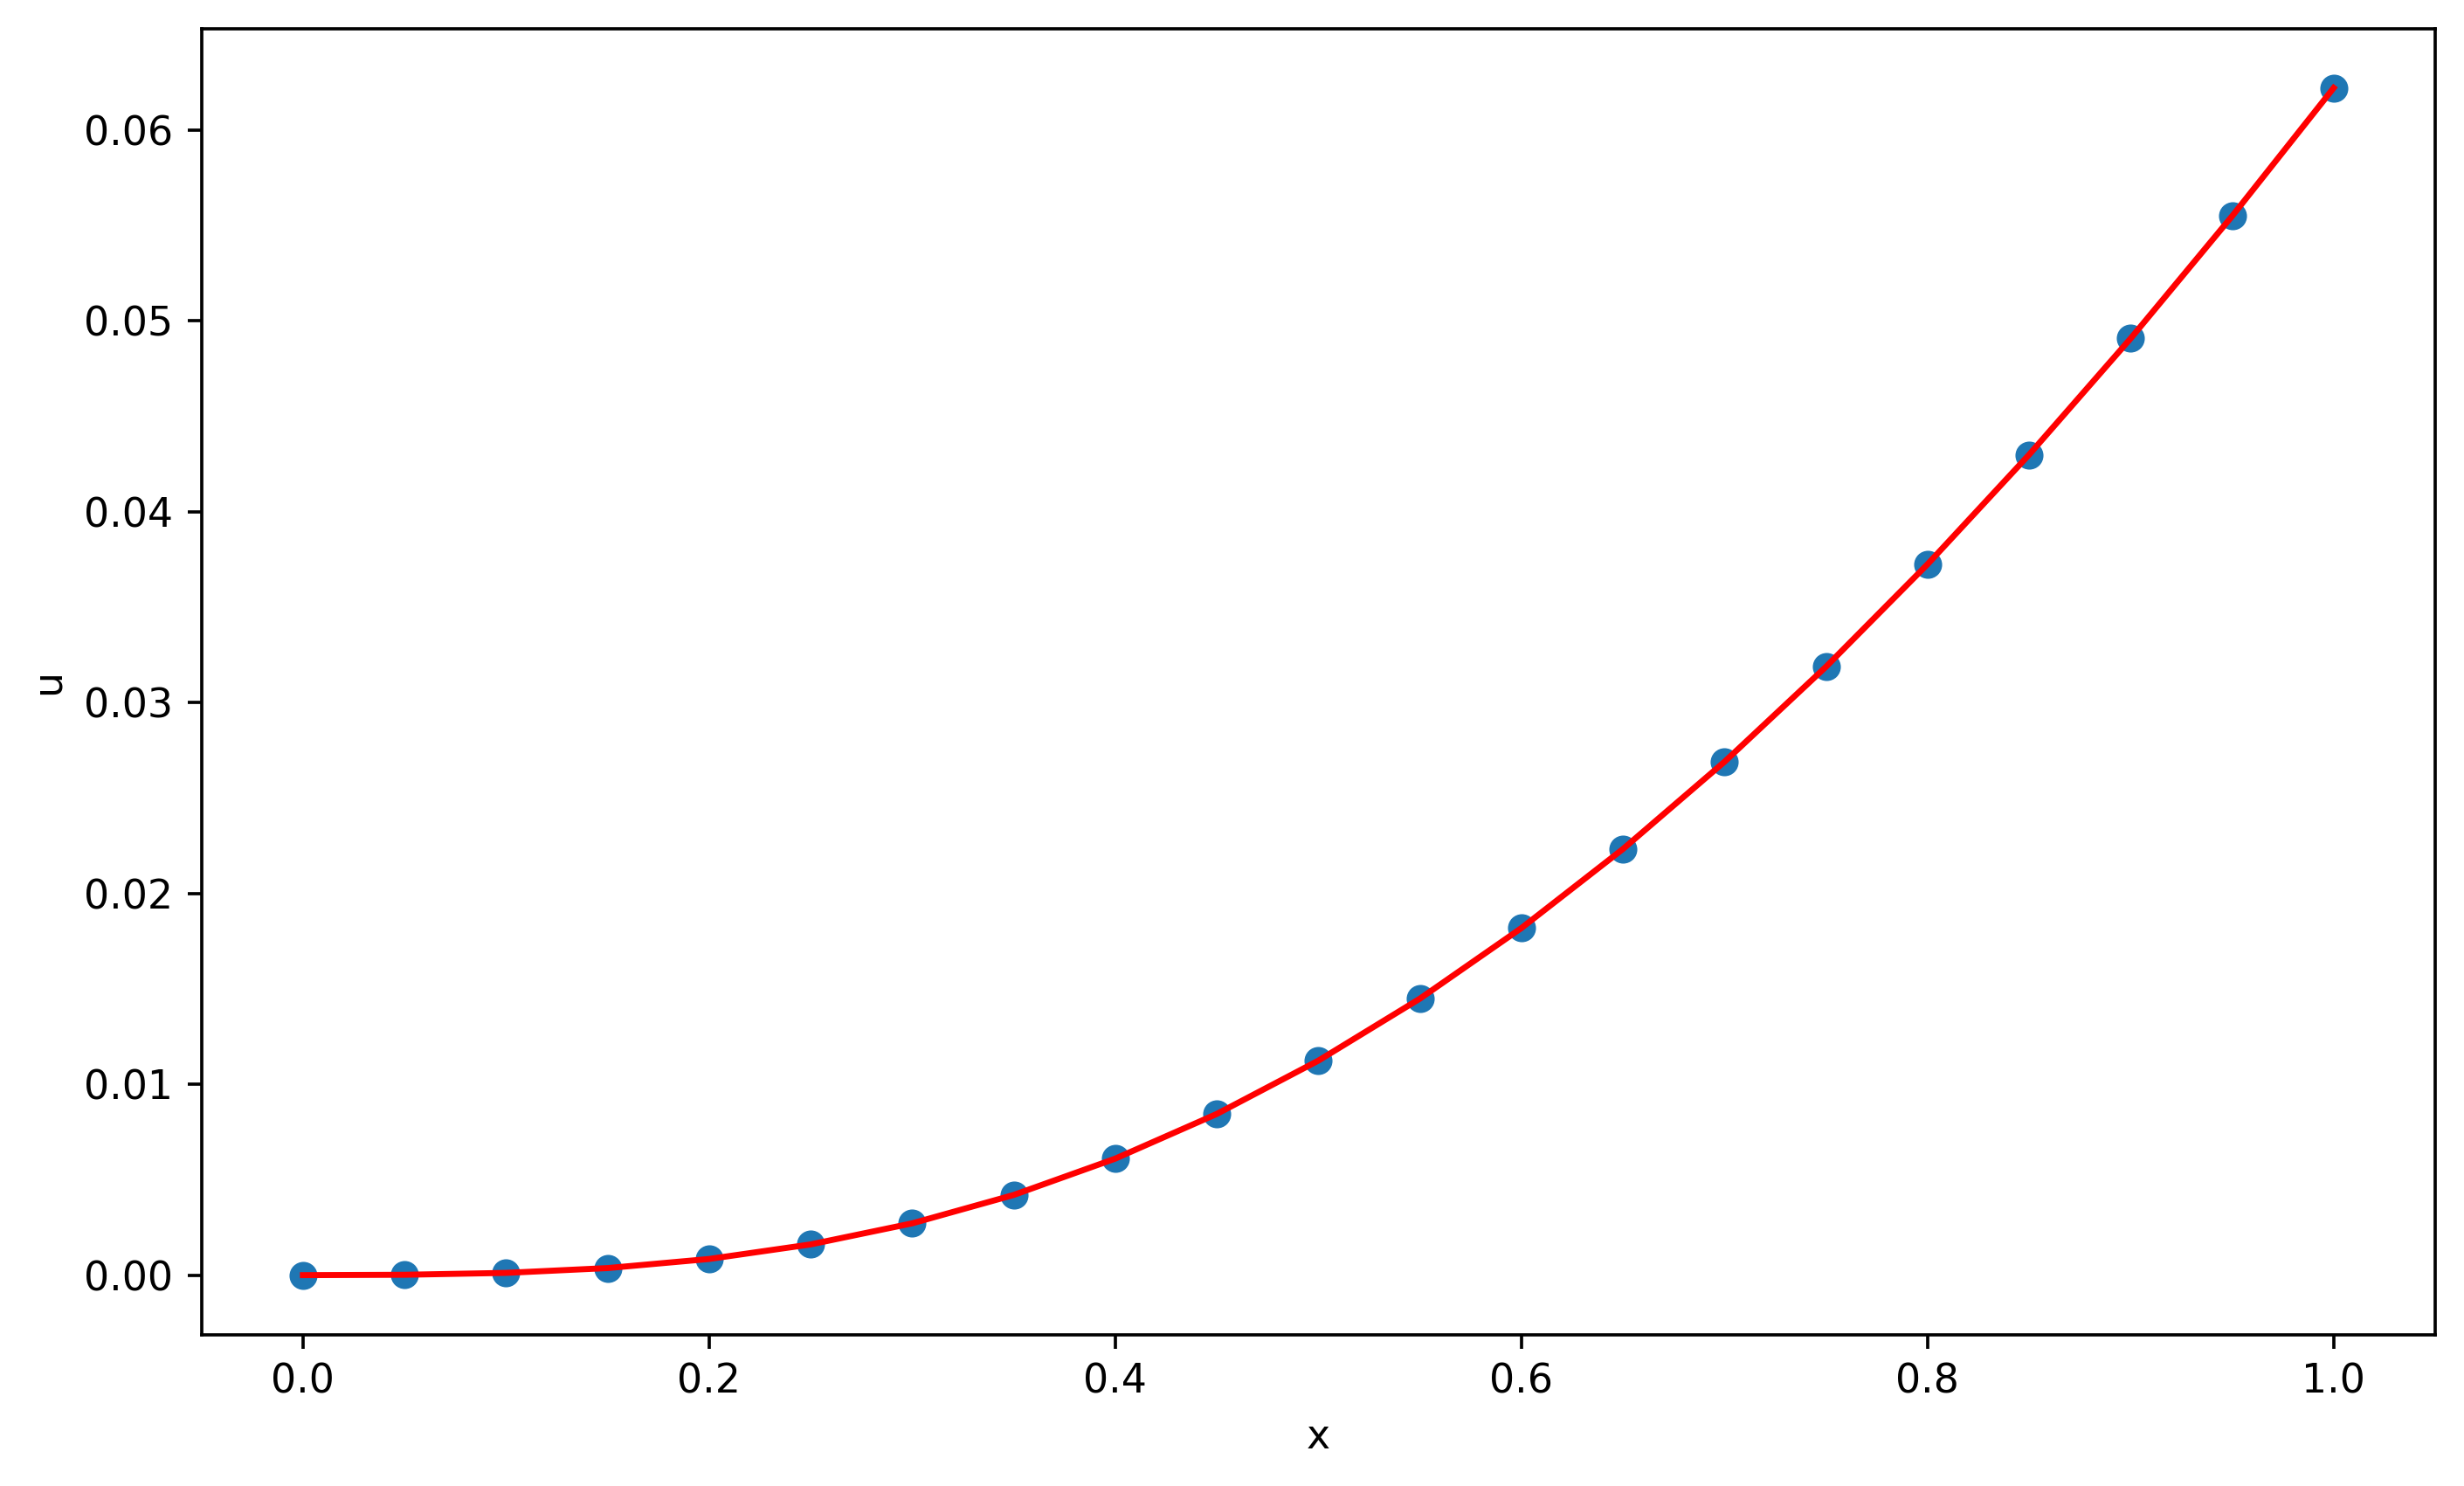

In [63]:
plt.figure(figsize=(10, 6), dpi=330)

plt.plot(xs, us, color="red")
plt.scatter(xs, us)

plt.xlabel("x")
plt.ylabel("u")
plt.show()